In [44]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random

In [45]:
# loading unscaled data into X and y from sklearn.datasets
X, y = load_digits(return_X_y=True)

In [46]:
X.shape

(1797, 64)

In [47]:
y.shape

(1797,)

In [48]:
# Convert NumPy array X to a DataFrame
X_df = pd.DataFrame(X)

In [49]:
# Now you can use .head()
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [50]:
# converting Numpy array y to DataFrame
y_df = pd.DataFrame(y)

In [51]:
y_df.head()

,0
0,0
1,1
2,2
3,3
4,4


In [52]:
# loading StandardScaler
sc = StandardScaler()

In [53]:
X_scaled = sc.fit_transform(X_df)

In [54]:
# splitting training and testing data using train_test_split
X_train_scaled, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [55]:
# loading the classifier
clf = SVC(kernel = "linear")

In [56]:
# training the model
clf.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [67]:
# making prediction on testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred, average="macro")
print("Support Vectors:")
print(clf.support_vectors_)
print(f"Accuracy score: {accuracy*100.:2f}%")
print(f"Precision score: {precision*100.:2f}%")

Support Vectors:
[[ 0.         -0.33501649 -1.09493684 ...  0.37903986 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  0.79840364 ... -0.97712664 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ... -0.63808502 -0.5056698
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.67419451 ...  1.22664392  1.93967098
   0.34174135]
 [ 0.         -0.33501649 -1.09493684 ...  0.03999823 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  0.37766131 ...  0.37903986 -0.5056698
  -0.19600752]]
Accuracy score: 97.500000%
Precision score: 97.527852%


In [68]:
def compute_confusion_matrix(actual, predicted):
    # Initialize counts
    confusion_matrix = np.zeros((10, 10), dtype=int)

    # Calculate confusion matrix
    for a, p in zip(actual, predicted):
        confusion_matrix[a, p] += 1

    return confusion_matrix

In [69]:
# Compute the confusion matrix
confusion = compute_confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  1  0 45  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  1  0  0  0  1  0 38]]


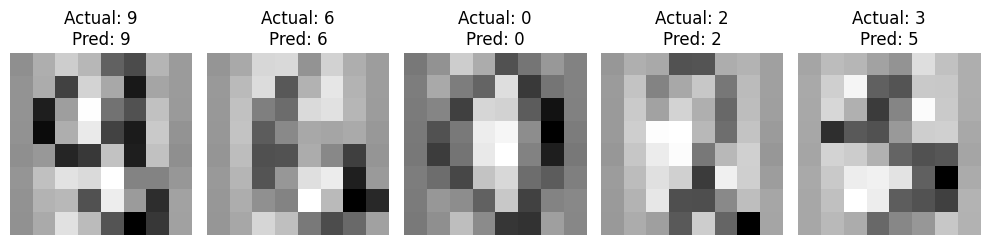

In [70]:
# fetching random samples from dataset and visualizing it
plt.figure(figsize=(10, 5))
for i in range(5):
    random_index = random.randint(0, len(X_test) - 1) # selects a random index from the test data
    random_sample = X_test[random_index].reshape(1, -1) # reshapes the data to fit the model for prediction
    random_actual_label = y_test[random_index] 
    # Accesses the label corresponding to the randomly selected test sample used to compare against prediction
    random_predicted_label = clf.predict(random_sample)[0] # using model to predict output of random example

    # Plot the digit
    plt.subplot(1, 5, i + 1)  # Create a 1x5 grid for 5 images
    plt.imshow(X_test[random_index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest") # Renders the digit image in the subplot.
    plt.title(f"Actual: {random_actual_label}\nPred: {random_predicted_label}") 
    # displays actual value and predicted value above each random image
    plt.axis('off')  # Hide the axes for a cleaner look

plt.tight_layout()
plt.show()
